# Loading Libraries



In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

# Loading Dataset


In [2]:
train_data  = pd.read_csv("train_set.csv")

In [3]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [5]:
train_data.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [6]:
train_data['Overtime'] = train_data['Overtime'].apply(lambda x: 0 if x<=0 else x)
train_data['Salaries'] = train_data['Salaries'].apply(lambda x: 0 if x<=0 else x)
train_data['H/D'] = train_data['H/D'].apply(lambda x: 0 if x<=0 else x)

In [7]:
train_data.Year=train_data.Year.astype(int)
train_data["Year"]= 2021- train_data.Year
train_data.Year

0         6
1         8
2         6
3         5
4         8
         ..
287831    5
287832    6
287833    7
287834    8
287835    6
Name: Year, Length: 287836, dtype: int64

In [8]:
train_data=train_data.dropna()

In [9]:
train_data = train_data.select_dtypes(exclude='object')

In [10]:
train_data.head(2)

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
0,6,4,250,6725,12196,0,0.00,16158
1,8,4,39,25058,74639,2820,12703.31,115784


In [11]:
for i in train_data.columns:
  print("number of unique values in", i, train_data[i].nunique())

number of unique values in Year 4
number of unique values in OGC 7
number of unique values in UC 789
number of unique values in EI 52392
number of unique values in Salaries 104375
number of unique values in Overtime 33609
number of unique values in H/D 113568
number of unique values in Total_Compensation 155957


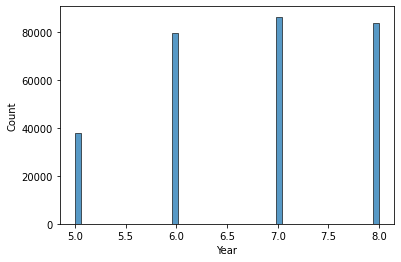

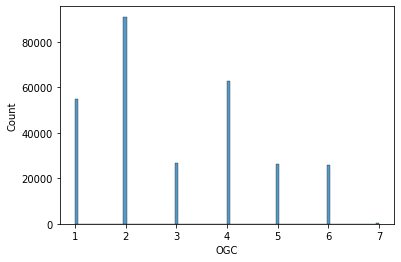

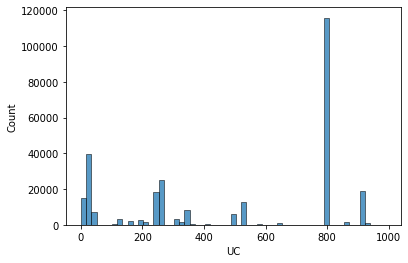

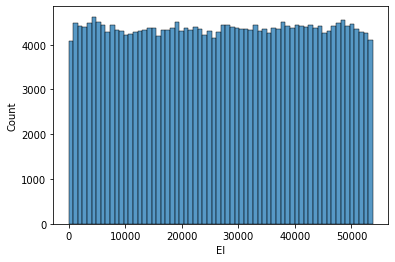

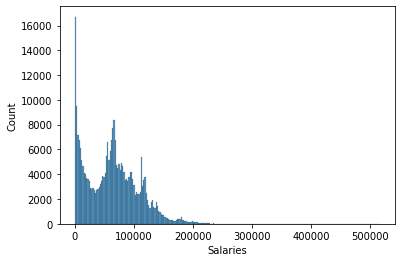

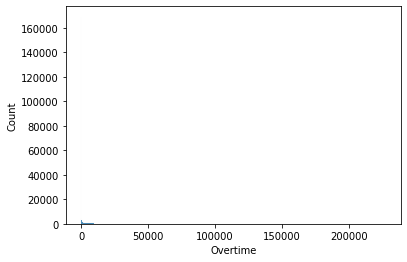

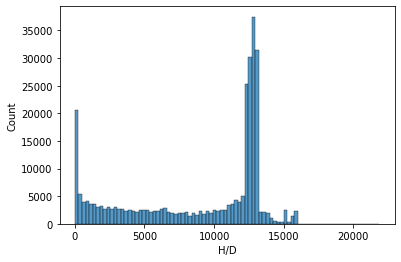

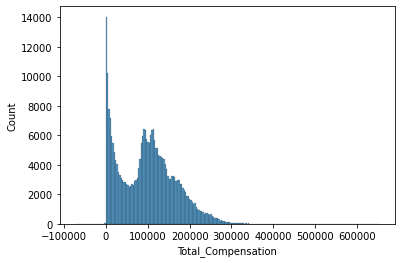

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(train_data.columns):
    plt.figure(i)
    sns.histplot(train_data[col])


# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we want to predict the compensation of the employees, so the 'Total_Compensation' variable is our target variable and remaining features are input variable.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [13]:
# Input/independent variables
X = train_data.drop('Total_Compensation', axis = 1)   # her we are droping the 'Total_Compensation' feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = train_data['Total_Compensation']             # Output/Dependent variable

# Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.



In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

# Building Model
Now we are finally ready, and we can train the model.

There are tons of Machine Learning models like Linear Regression, Random Forest, Decision Tree, etc. to say you some. However here we are using Linear Regressor (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_validate
from lightgbm import LGBMRegressor

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)

### Train the model

In [20]:
models = [RandomForestRegressor(random_state=42),XGBRegressor(random_state=42),ExtraTreesRegressor(random_state=42),
          LinearRegression(),LinearSVR(random_state=42), LGBMRegressor(random_state=42)]
for model in models:
    print(f"********************{model}*********************")
    cv = cross_validate(model,X_train,y_train,cv=5,scoring=['neg_root_mean_squared_error'])
    print(cv['test_neg_root_mean_squared_error'].mean())

********************RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)*********************
-6803.281817131657
********************XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=

In [ ]:
for i in range(100,1001,50):
    print(f"result for n_estimator: {i}")
    ext = ExtraTreesRegressor(random_state=42,n_estimators=i)
    ext.fit(X_train,y_train)
    print(np.sqrt(mean_squared_error(y_val,ext.predict(X_val))))

result for n_estimator 100
6504.014255589795
result for n_estimator 150
6491.576445924451
result for n_estimator 200
6484.87454730577
result for n_estimator 250
6482.2963450606785
result for n_estimator 300
6474.888326277029
result for n_estimator 350
6473.83106716503
result for n_estimator 400
6472.716889553399
result for n_estimator 450
6471.653853457074
result for n_estimator 500


In [18]:
for i in range(10,31,1):
    print(f"result for max_depth {i}")
    ext = ExtraTreesRegressor(random_state=42,n_estimators=450,max_depth=i)
    ext.fit(X_train,y_train)
    print(np.sqrt(mean_squared_error(y_val,ext.predict(X_val))))

result for max_depth 10
7455.973435446812
result for max_depth 11
7117.44797546692
result for max_depth 12
6843.942003006923
result for max_depth 13
6696.038091157883
result for max_depth 14
6582.705700623317
result for max_depth 15
6482.1321192626365
result for max_depth 16
6410.250069128377
result for max_depth 17
6358.175712264838
result for max_depth 18
6312.6497592766045
result for max_depth 19
6284.92395090951
result for max_depth 20
6273.765611297779
result for max_depth 21
6279.499101879161
result for max_depth 22
6288.563958690283
result for max_depth 23
6300.232978546407
result for max_depth 24
6320.4180211784305
result for max_depth 25
6347.276118767775
result for max_depth 26
6365.603709753865
result for max_depth 27
6388.920118568165
result for max_depth 28
6414.4300188144125
result for max_depth 29
6421.432596619207
result for max_depth 30
6433.996956160881


In [19]:
ext = ExtraTreesRegressor(random_state=42,n_estimators=450,max_depth=20)
ext.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=20, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=450, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

# Validate The Model
### Predict on the validation data (X_val)
Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [20]:
pred = ext.predict(X_val)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Mean Squared Error (in short MSE), Mean Absolute Error (in short MAE), Root Mean Squared Erro (in short RMSE), Root Mean Squared Log Error (in short RMSLE) etc. However, **RMSE** is the metric for this data sprint. 

In [21]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error

In [22]:
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred))) 

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

Root Mean Squared Error is:  6273.765611297779


# Predict The Output For Testing Dataset



## Load Test Set

In [32]:
test_data = pd.read_csv('test_set.csv')

In [33]:
test_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Management Assistant,6161,74526,0,13068.800000,Fiscal
1,2013,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,Public Service Aide,Public Svc Aide-Public Works,17890,7219,0,3328.053046,Calendar
2,2016,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Sub-Professional Engineering,"Stdntdsgntrain1, Arch/Eng/Plng",15092,4616,0,1147.260000,Fiscal
3,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,5144,6345,0,1433.600000,Calendar
4,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Trans And Dist Line Worker,40128,105851,153,12242.440000,Calendar


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47860 entries, 0 to 47859
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      47860 non-null  int64  
 1   OGC       47860 non-null  int64  
 2   OG        47860 non-null  object 
 3   DC        47860 non-null  object 
 4   Dept      47860 non-null  object 
 5   UC        47860 non-null  int64  
 6   Union     47853 non-null  object 
 7   JF        47853 non-null  object 
 8   Job       47860 non-null  object 
 9   EI        47860 non-null  int64  
 10  Salaries  47860 non-null  int64  
 11  Overtime  47860 non-null  int64  
 12  H/D       47860 non-null  float64
 13  YT        47860 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 5.1+ MB


In [35]:
test_data['Overtime'] = test_data['Overtime'].apply(lambda x: 0 if x<=0 else x)
test_data['Salaries'] = test_data['Salaries'].apply(lambda x: 0 if x<=0 else x)
test_data['H/D'] = test_data['H/D'].apply(lambda x: 0 if x<=0 else x)

In [36]:
test_data.Year=test_data.Year.astype(int)
test_data["Year"]= 2021- test_data.Year
test_data.Year

0        5
1        8
2        5
3        6
4        6
        ..
47855    6
47856    8
47857    6
47858    8
47859    6
Name: Year, Length: 47860, dtype: int64

In [37]:
test_data = test_data.select_dtypes(exclude='object')
test_data=scaler.transform(test_data)

## Make Prediction on Test Dataset

In [38]:
target = ext.predict(test_data)

In [39]:
res = pd.DataFrame(target) 
res.columns = ["Compensation"]
res.to_csv("submission.csv", index = False)